# Nsaba Demonstration

## Nsaba is a tool that can be used to compare gene expression in brain regions associated with  terms often used in the neuroscience literature. 

This toolbox can ask questions such as, "Is the D2 receptor expressed significantly higher in brain regions that are activated in studies that talk about 'reward'?"

In this notebook I will demonstrate some of the functionality of the Nsaba toolbox to explore the relationship between D2 receptors and reward. 

In [1]:
%config InlineBackend.figure_format = 'retina'
#%pylab inline
from nsaba import *
import nsaba.nsaba.geneinfo
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import itertools


In [2]:
ns_path = "/Users/Torben/Documents/ABI analysis/current_data_new/"
#ns_path = '/Users/SP/Documents/'
aba_path = '/Users/Torben/Documents/ABI analysis/normalized_microarray_donor9861/'
#aba_path = '/Users/SP/Documents/'
#nsaba.Nsaba.aba_load(aba_path)
nsaba.nsaba.Nsaba.ns_load(ns_path)
nsaba.nsaba.Nsaba.aba_load(aba_path)
N = nsaba.nsaba.Nsaba()
N.load_ge_pickle(pkl_file='/Users/Torben/Documents/ABI analysis/normalized_microarray_donor9861/Nsaba_ABA_ge.pkl')

This may take a minute or two ...
database.txt loaded.
features.txt loaded.
Nsaba.ns['mni_coords'] initialized.

This may take a minute or two ...
SampleAnnot.csv loaded.
MicroarrayExpression.csv loaded.
Probes.csv loaded.
Nsaba.aba['mni_coords'] initialized.

This may take a minute or two ...
'ge' dictionary successfully loaded


### Gathering data for two genes and two terms
* 'Reward' and 'Motivation' - Words used to describe behaviors associated with basal ganglia circuitry
* entrez ID: 1813 - DRD2, the D2 dopamine receptor
* entrez ID: 6531 - SLC6A3, a gene that encodes the dopamine transporter


In [3]:
term1 = 'reward'
term2 = 'motivation'
genes = [1813 , 6531]
nsaba.nsaba.geneinfo.gene_info(str(genes[0]))
nsaba.nsaba.geneinfo.gene_info(str(genes[1])) 

N.get_ns_act(term1, thresh=-1, method='knn')
N.get_ns_act(term2, thresh=-1, method='knn')

This may take a few minutes...
This may take a few minutes...


### Visualizing  gene expression of one gene

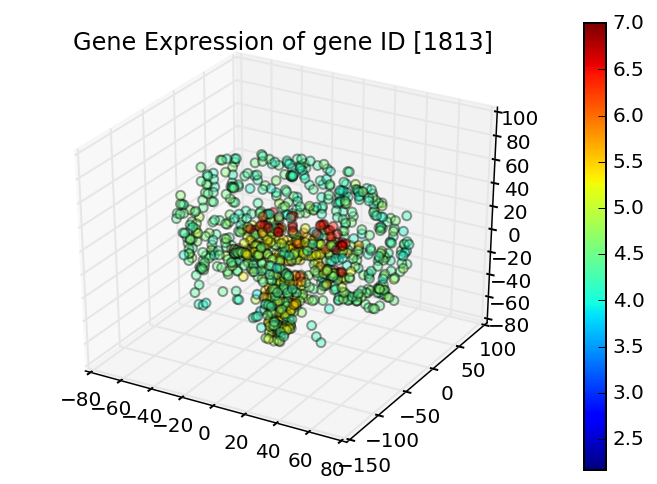

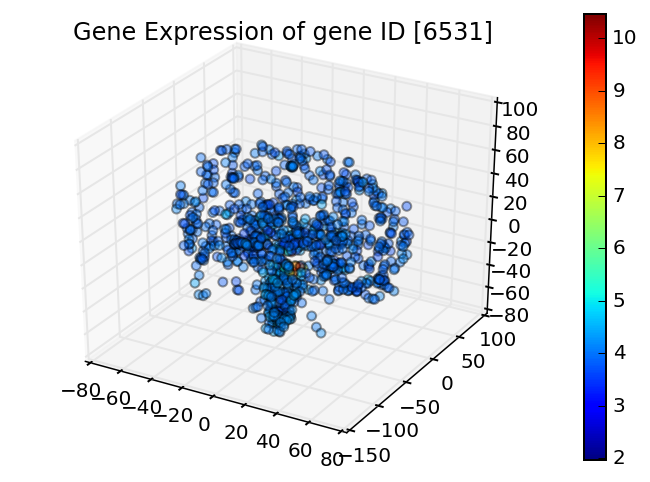

In [14]:
from nsaba.nsaba.visualizer import NsabaVisualizer
V = NsabaVisualizer(N)
V.visualize_ge([genes[0]])
V.visualize_ge([genes[1]])

#Plotting activation of 1 term

This could take a minute


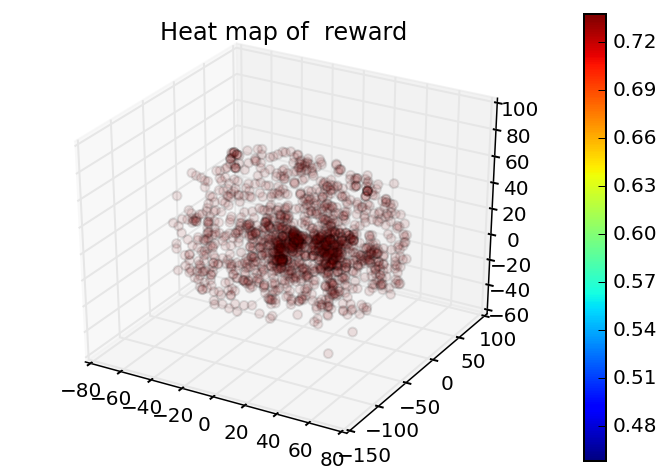

In [7]:
V.visualize_ns('reward',no_ids = 50)

ooo


#Plotting the correlation between two genes

(array([[ 1.        ,  0.35283388],
        [ 0.35283388,  1.        ]]),
 [0.33555195928373605, 1.3717596592325352])

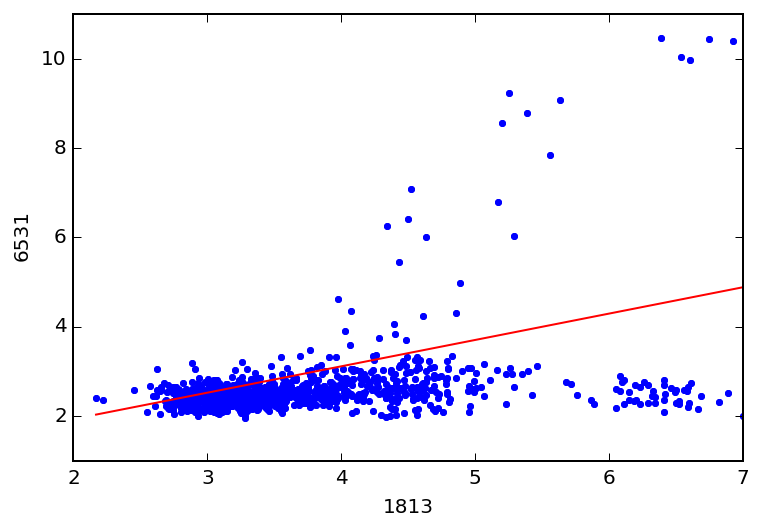

In [13]:
V.visualize_ge_ge(genes)

#Plotting correlation between two terms

(array([[ 1.        ,  0.14570579],
        [ 0.14570579,  1.        ]]),
 [0.072167405298738455, 0.0016106915227061878])

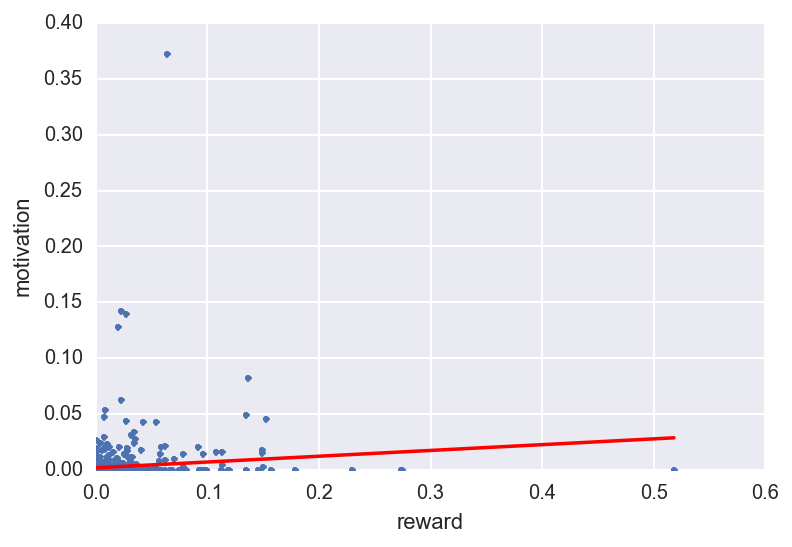

In [8]:
V.visualize_ns_ns(term1,term2)

### Correlating activation of one term with expression of one gene

(array([[ 1.        ,  0.06368729],
        [ 0.06368729,  1.        ]]),
 [0.0025777445159347288, 0.0033018573698162246])

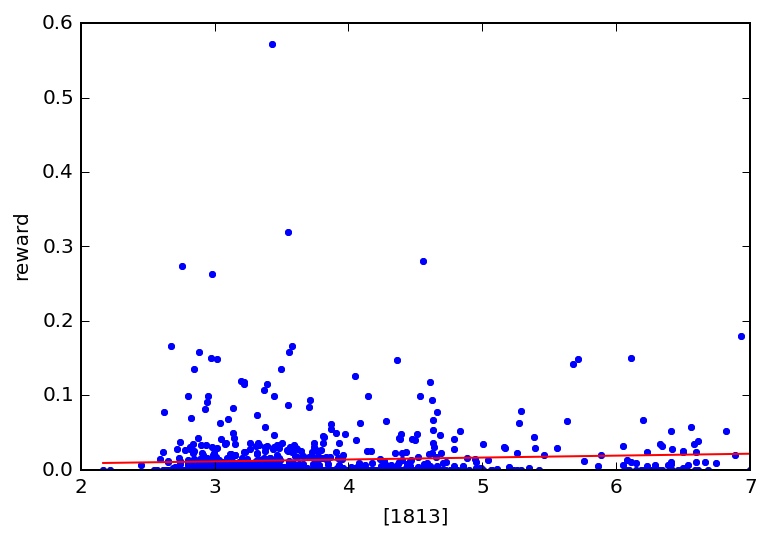

In [15]:
V.visualize_ns_ge('reward',[genes[0]])

To use inline plotting functionality in Jupyter, '%matplotlib inline' must be enabled
t-value: -3.6482 
p-value: 2.789E-04
Effect size: -0.3361 



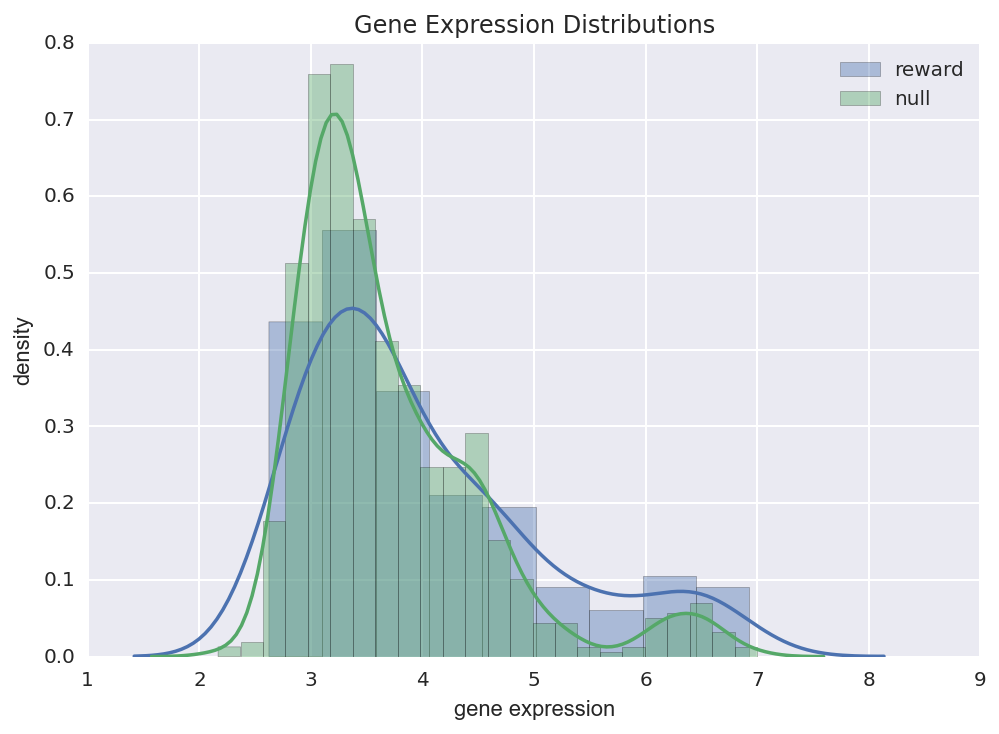

In [17]:
from nsaba.nsaba.analysis import NsabaAnalysis

A = NsabaAnalysis(N)
A.t_test('reward',genes[0])

In [19]:
tttest_metrics = A.t_test_multi('reward')

This may take a couple of minutes ...


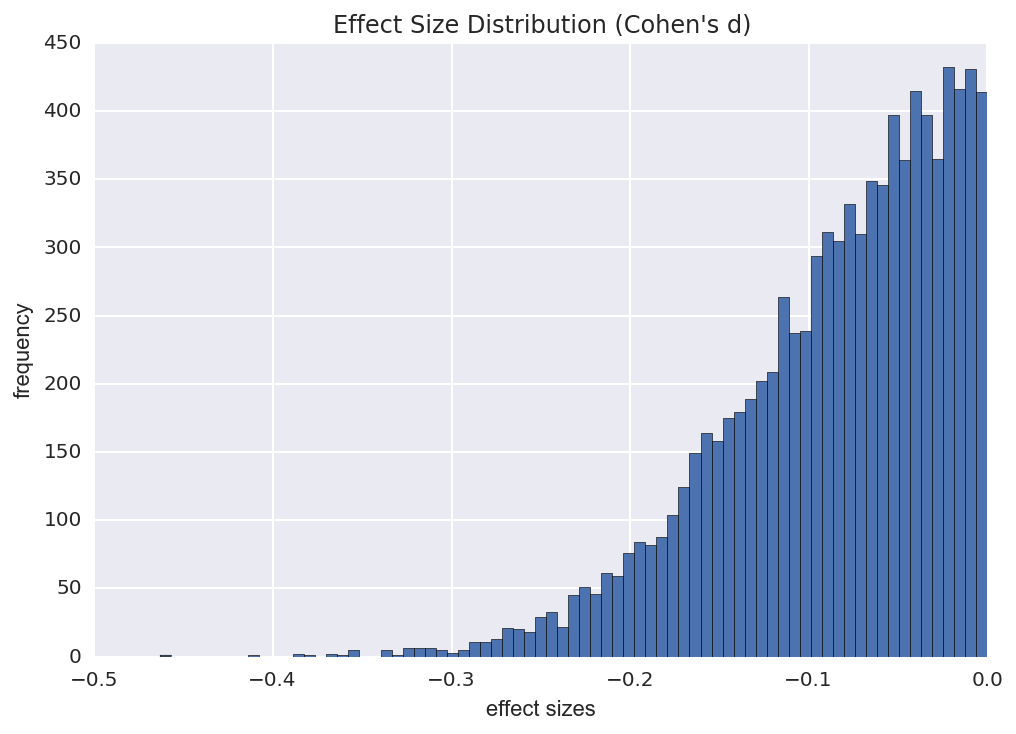

In [20]:
A.effect_size_distr(tttest_metrics)

In [21]:
A.fetch_gene_descriptions(tttest_metrics)

Fetching NIH gene descriptions ...
392197.0 isn't registered with the NIH
341.0 isn't registered with the NIH
886.0 isn't registered with the NIH
134391.0 isn't registered with the NIH
79413.0 isn't registered with the NIH


KeyboardInterrupt: 

341.0